In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
#import analyse_sampling_dataset

# DataSet preparation (preprocessing + sampling)

In [2]:
df = pd.read_csv('/home/jbara/Desktop/scripts/HAMID/HAMID/datasets/loan_data.csv')

In [3]:
#rename the target to 'class_label
df.rename(columns={'credit.policy': 'class_label'}, inplace=True)

In [4]:
df.shape

(9578, 14)

In [5]:
# Print the imbalance ratio in the dataset
count = df['class_label'].value_counts()
imbalance_ratio = count.max() / count.min()
print("Imbalance ratio:", imbalance_ratio)

Imbalance ratio: 4.127408993576017


In [6]:
count

class_label
1    7710
0    1868
Name: count, dtype: int64

In [7]:
# Encoding categorical features
encoder = LabelEncoder()
df['purpose'] = encoder.fit_transform(df['purpose'])

In [8]:
# Scaling numerical features
scaler = MinMaxScaler()
exclude = ['class_label', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']
cols_to_scale = df.columns.difference(exclude)
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [9]:
# Define features and target variable
X = df.drop(columns=['class_label'])
y = df['class_label']

In [10]:
# Perform stratified sampling
X_train, X_subset, y_train, y_subset = train_test_split(X, y, test_size=0.03, stratify=y, random_state=42)

In [11]:
# Preparing the subset that we will consider as the datase
X_subset.reset_index(drop=True, inplace=True)
y_subset.reset_index(drop=True, inplace=True)

In [12]:
# Concatenate features and labels into a single DataFrame
df_train = pd.concat([X_subset, y_subset], axis=1).reset_index(drop=True)

In [13]:
count2 = df_train['class_label'].value_counts()
count2

class_label
1    232
0     56
Name: count, dtype: int64

In [14]:
386*35

13510

In [15]:
56*56

3136

In [16]:
(232*17)/3136

1.2576530612244898

In [17]:
def columns_of_concatenated_ds(df_train):
    c = list(df_train.columns.drop(['class_label']))
    columns = c + [e + '_N' for e in c] + ['class_label']
    return columns

In [18]:
columns = columns_of_concatenated_ds(df_train)

# Concatenated Datasets generation

In [19]:
config_GA = {
    'pop_size': 100,
    'individual_size': 17,
    'num_generations': 10,
    'mutation_rate': 0.05,
    'crossover_type': 'two-point',
    'stagnation_limit': 7  # Number of generations with no improvement
}

## Random selection of Set_N

In [20]:
import Set_N_random_selection
train_C_random = Set_N_random_selection.main(df_train, columns, config_GA)

## Weighted selection of Set_N

In [21]:
import Set_N_weighted_selection
train_C_weighted = Set_N_weighted_selection.main(df_train, columns, config_GA)

## Fix the initial conditions for the GA algorithm

In [22]:
 import select_potential_indecies
import initial_population
N = df_train[df_train['class_label'] == df_train['class_label'].value_counts().idxmax()].reset_index(drop=True)
potential_indices = select_potential_indecies.weight_calculation(df_train, N)

population = initial_population.initialize_population(config_GA['pop_size'],
                                                          potential_indices,
                                                          config_GA['individual_size'])



## GA1

2024-05-27 14:40:14,657 - INFO - Initializing GA with population size: 100
2024-05-27 14:41:42,932 - INFO - New best fitness found: 0.009941
2024-05-27 14:41:42,933 - INFO - Generation 0 complete. Best fitness: 0.009941


time taken in generation 0 : 88.2746 seconds


2024-05-27 14:43:04,128 - INFO - New best fitness found: 0.009270
2024-05-27 14:43:04,128 - INFO - Generation 1 complete. Best fitness: 0.009270


time taken in generation 1 : 81.1949 seconds


2024-05-27 14:44:22,892 - INFO - New best fitness found: 0.008651
2024-05-27 14:44:22,892 - INFO - Generation 2 complete. Best fitness: 0.008651


time taken in generation 2 : 78.7637 seconds


2024-05-27 14:45:40,894 - INFO - Generation 3 complete. Best fitness: 0.008651


time taken in generation 3 : 78.0017 seconds


2024-05-27 14:46:57,739 - INFO - New best fitness found: 0.006914
2024-05-27 14:46:57,739 - INFO - Generation 4 complete. Best fitness: 0.006914


time taken in generation 4 : 76.8443 seconds


2024-05-27 14:48:14,668 - INFO - Generation 5 complete. Best fitness: 0.006914


time taken in generation 5 : 76.9283 seconds


2024-05-27 14:49:31,435 - INFO - New best fitness found: 0.006085
2024-05-27 14:49:31,435 - INFO - Generation 6 complete. Best fitness: 0.006085


time taken in generation 6 : 76.7666 seconds


2024-05-27 14:50:48,819 - INFO - New best fitness found: 0.005213
2024-05-27 14:50:48,819 - INFO - Generation 7 complete. Best fitness: 0.005213


time taken in generation 7 : 77.3834 seconds


2024-05-27 14:52:06,187 - INFO - New best fitness found: 0.004283
2024-05-27 14:52:06,188 - INFO - Generation 8 complete. Best fitness: 0.004283


time taken in generation 8 : 77.3680 seconds


2024-05-27 14:53:22,539 - INFO - New best fitness found: 0.003712
2024-05-27 14:53:22,540 - INFO - Generation 9 complete. Best fitness: 0.003712


time taken in generation 9 : 76.3520 seconds
best_individual, [109, 117, 151, 188, 75, 69, 204, 36, 13, 7, 91, 231, 229, 181, 116, 185, 211]
Set_N       purpose  int.rate  installment  log.annual.inc       dti      fico  \
109  0.666667  0.661765     0.250565        0.401193  0.573765  0.232558   
117  0.333333  0.595269     0.171352        0.482403  0.315421  0.558140   
151  0.333333  0.111253     0.137549        0.532451  0.598798  0.697674   
188  0.000000  0.187980     0.601664        0.704919  0.021696  0.790698   
75   1.000000  0.457801     0.530996        0.626125  0.135514  0.395349   
69   0.166667  0.187980     0.498567        0.568043  0.071429  0.790698   
204  0.166667  0.328645     0.479821        0.446812  0.474299  0.627907   
36   1.000000  0.397059     0.109187        0.512806  0.594793  0.534884   
13   0.333333  0.750639     0.840265        0.505892  0.761348  0.232558   
7    0.000000  0.273657     0.089067        0.552950  0.304740  0.395349   
91   0.333333  0.

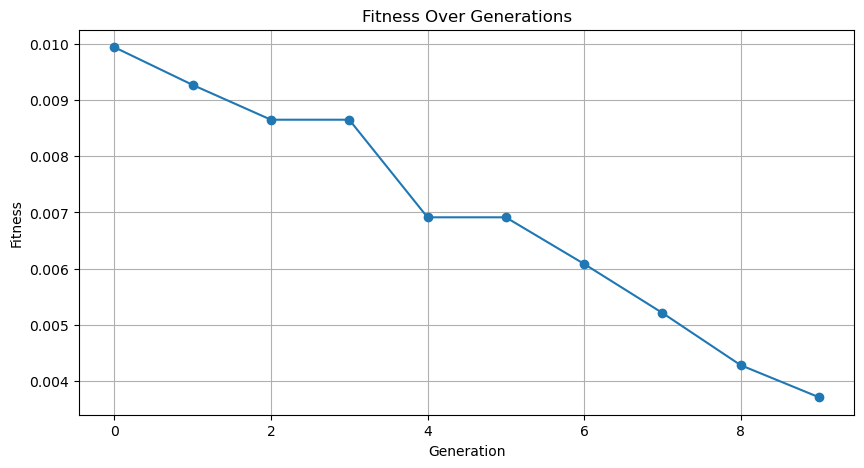

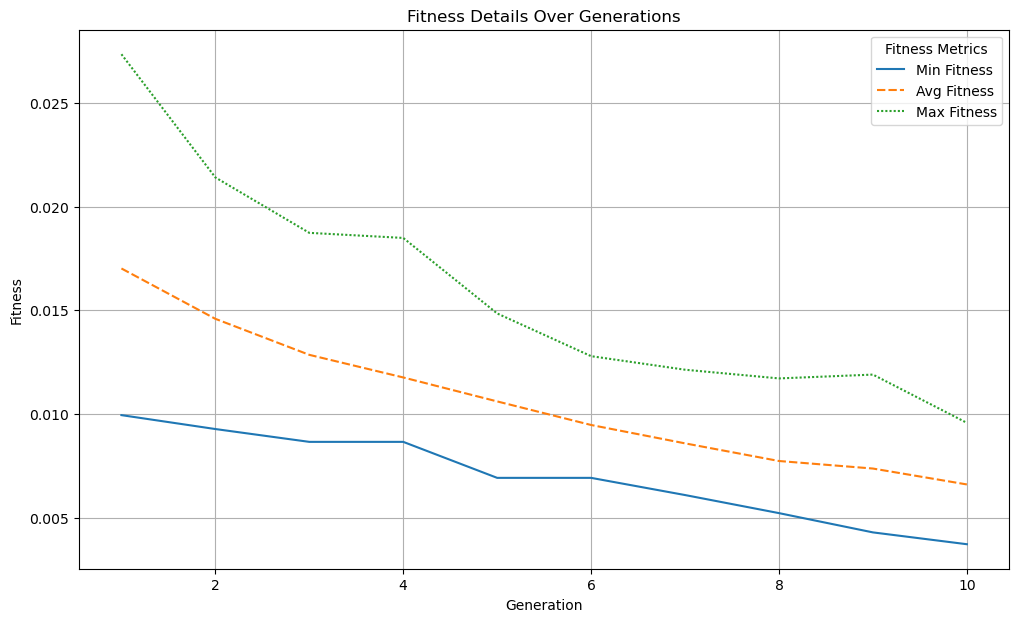

In [23]:
import Set_N_GA
train_C_GA1 = Set_N_GA.main(df_train, columns, config_GA, population, 1)

## GA2

2024-05-27 14:53:22,852 - INFO - Initializing GA with population size: 100
2024-05-27 14:54:40,400 - INFO - New best fitness found: 0.009941
2024-05-27 14:54:40,400 - INFO - Generation 0 complete. Best fitness: 0.009941


time taken in generation 0 : 77.5472 seconds


2024-05-27 14:55:58,038 - INFO - New best fitness found: 0.009670
2024-05-27 14:55:58,038 - INFO - Generation 1 complete. Best fitness: 0.009670


time taken in generation 1 : 77.6378 seconds


2024-05-27 14:57:15,478 - INFO - New best fitness found: 0.008451
2024-05-27 14:57:15,479 - INFO - Generation 2 complete. Best fitness: 0.008451


time taken in generation 2 : 77.4398 seconds


2024-05-27 14:58:32,823 - INFO - New best fitness found: 0.007445
2024-05-27 14:58:32,824 - INFO - Generation 3 complete. Best fitness: 0.007445


time taken in generation 3 : 77.3447 seconds


2024-05-27 14:59:50,436 - INFO - Generation 4 complete. Best fitness: 0.007445


time taken in generation 4 : 77.6120 seconds


2024-05-27 15:01:08,417 - INFO - New best fitness found: 0.007220
2024-05-27 15:01:08,418 - INFO - Generation 5 complete. Best fitness: 0.007220


time taken in generation 5 : 77.9815 seconds


2024-05-27 15:02:26,999 - INFO - New best fitness found: 0.006623
2024-05-27 15:02:27,000 - INFO - Generation 6 complete. Best fitness: 0.006623


time taken in generation 6 : 78.5811 seconds


2024-05-27 15:03:45,030 - INFO - New best fitness found: 0.006245
2024-05-27 15:03:45,030 - INFO - Generation 7 complete. Best fitness: 0.006245


time taken in generation 7 : 78.0302 seconds


2024-05-27 15:05:03,174 - INFO - New best fitness found: 0.005379
2024-05-27 15:05:03,174 - INFO - Generation 8 complete. Best fitness: 0.005379


time taken in generation 8 : 78.1436 seconds


2024-05-27 15:06:20,772 - INFO - Generation 9 complete. Best fitness: 0.005379


time taken in generation 9 : 77.5972 seconds
best_individual, [114, 95, 9, 14, 13, 188, 34, 22, 204, 92, 109, 182, 124, 211, 53, 63, 231]
Set_N       purpose  int.rate  installment  log.annual.inc       dti      fico  \
114  0.333333  0.342711     0.766255        0.581696  0.284045  0.488372   
95   0.166667  0.437340     0.346696        0.607813  0.066756  0.465116   
9    0.166667  0.148338     0.085227        0.539615  0.278371  0.581395   
14   0.333333  0.187980     0.364533        0.540486  0.718625  0.581395   
13   0.333333  0.750639     0.840265        0.505892  0.761348  0.232558   
188  0.000000  0.187980     0.601664        0.704919  0.021696  0.790698   
34   0.000000  0.417519     0.707065        0.598857  0.053738  0.744186   
22   0.333333  0.611893     0.720153        0.464387  0.486315  0.232558   
204  0.166667  0.328645     0.479821        0.446812  0.474299  0.627907   
92   0.333333  0.397059     0.703787        0.568043  0.296729  0.511628   
109  0.666667  0.661

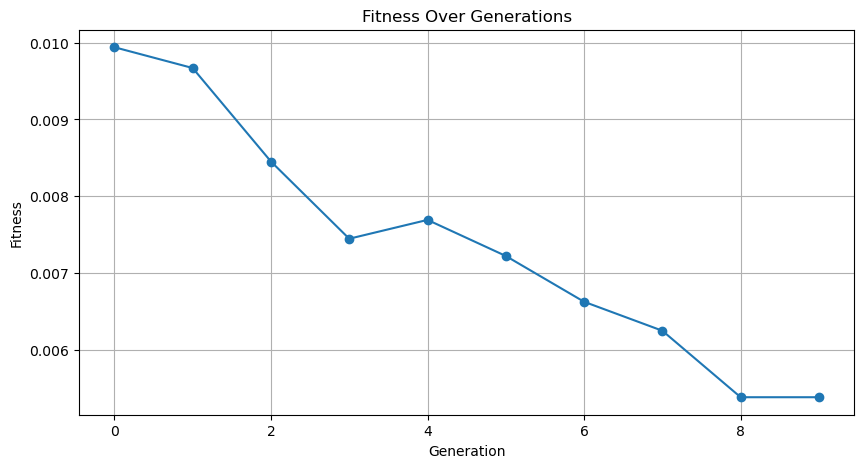

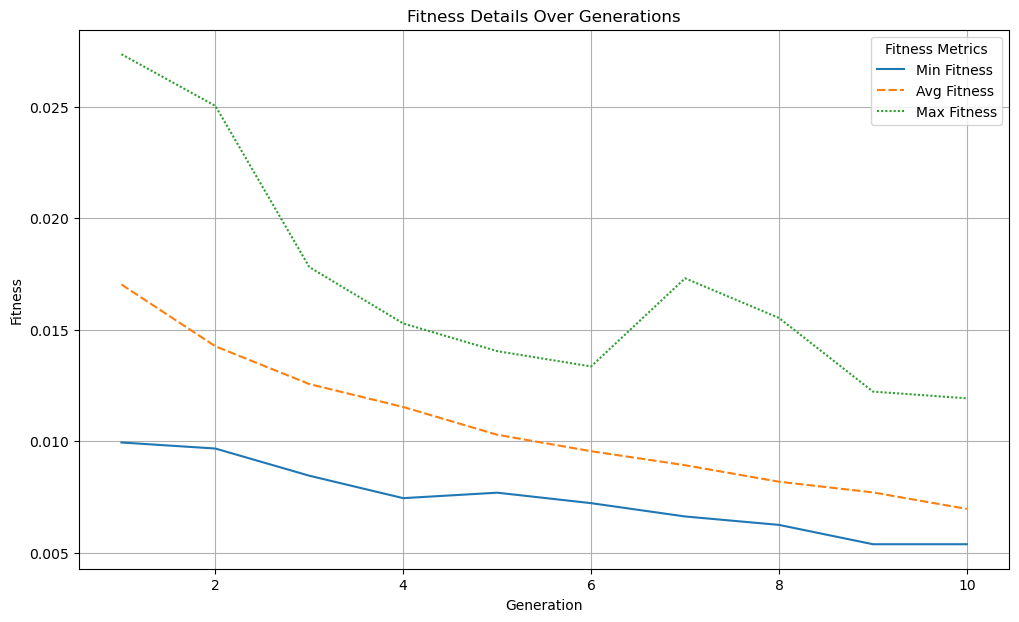

In [24]:
train_C_GA2 = Set_N_GA.main(df_train, columns, config_GA, population, 2)

## GA3

2024-05-27 15:06:21,002 - INFO - Initializing GA with population size: 100
2024-05-27 15:07:37,730 - INFO - New best fitness found: 0.009941
2024-05-27 15:07:37,731 - INFO - Generation 0 complete. Best fitness: 0.009941


time taken in generation 0 : 76.7277 seconds


2024-05-27 15:08:54,305 - INFO - Generation 1 complete. Best fitness: 0.009941


time taken in generation 1 : 76.5740 seconds


2024-05-27 15:10:11,764 - INFO - New best fitness found: 0.008470
2024-05-27 15:10:11,764 - INFO - Generation 2 complete. Best fitness: 0.008470


time taken in generation 2 : 77.4582 seconds


2024-05-27 15:11:29,171 - INFO - New best fitness found: 0.008169
2024-05-27 15:11:29,172 - INFO - Generation 3 complete. Best fitness: 0.008169


time taken in generation 3 : 77.4072 seconds


2024-05-27 15:12:46,533 - INFO - New best fitness found: 0.005967
2024-05-27 15:12:46,534 - INFO - Generation 4 complete. Best fitness: 0.005967


time taken in generation 4 : 77.3617 seconds


2024-05-27 15:14:03,883 - INFO - Generation 5 complete. Best fitness: 0.005967


time taken in generation 5 : 77.3485 seconds


2024-05-27 15:15:21,156 - INFO - Generation 6 complete. Best fitness: 0.005967


time taken in generation 6 : 77.2726 seconds


2024-05-27 15:16:37,714 - INFO - Generation 7 complete. Best fitness: 0.005967


time taken in generation 7 : 76.5566 seconds


2024-05-27 15:17:53,790 - INFO - New best fitness found: 0.004782
2024-05-27 15:17:53,791 - INFO - Generation 8 complete. Best fitness: 0.004782


time taken in generation 8 : 76.0769 seconds


2024-05-27 15:19:10,257 - INFO - New best fitness found: 0.004125
2024-05-27 15:19:10,258 - INFO - Generation 9 complete. Best fitness: 0.004125


time taken in generation 9 : 76.4664 seconds
best_individual, [181, 117, 159, 97, 167, 36, 109, 53, 69, 38, 210, 211, 139, 141, 56, 91, 207]
Set_N       purpose  int.rate  installment  log.annual.inc       dti      fico  \
181  0.333333  0.232097     0.503802        0.506334  0.321095  0.860465   
117  0.333333  0.595269     0.171352        0.482403  0.315421  0.558140   
159  0.000000  0.120205     0.152239        0.466719  0.563752  0.534884   
97   0.166667  0.212276     0.397741        0.419285  0.078104  0.860465   
167  0.000000  0.212276     0.190401        0.506334  0.324766  0.697674   
36   1.000000  0.397059     0.109187        0.512806  0.594793  0.534884   
109  0.666667  0.661765     0.250565        0.401193  0.573765  0.232558   
53   0.000000  0.148338     0.102253        0.441935  0.329105  0.651163   
69   0.166667  0.187980     0.498567        0.568043  0.071429  0.790698   
38   1.000000  0.705882     0.064091        0.415845  0.210948  0.348837   
210  1.000000  0.

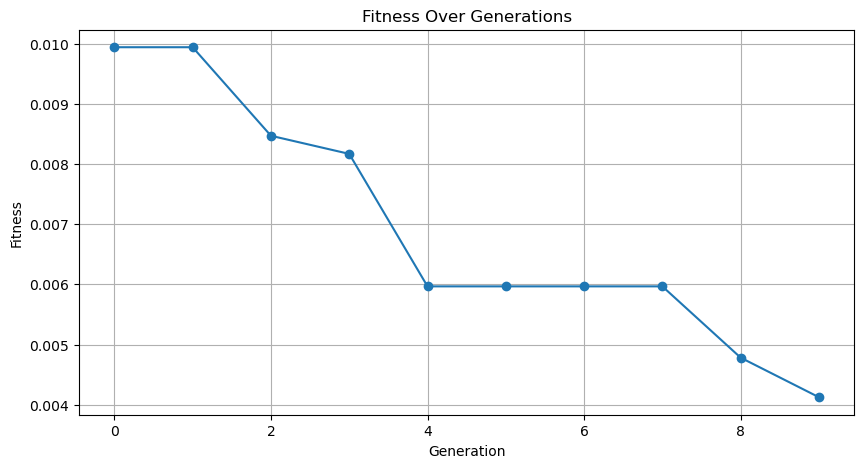

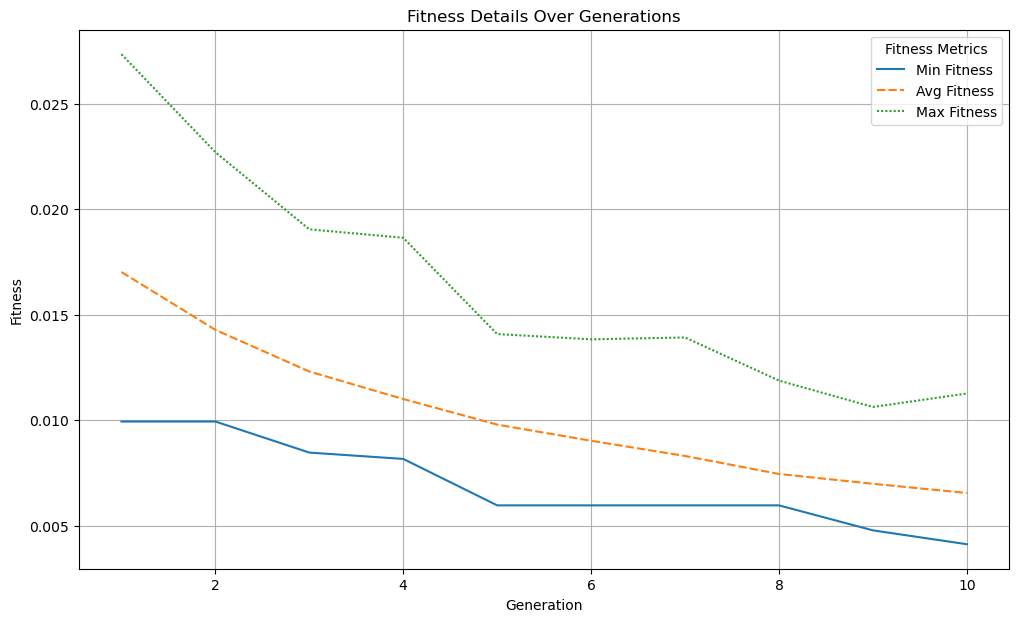

In [25]:
train_C_GA3 = Set_N_GA.main(df_train, columns, config_GA, population, 3)

## GA4

2024-05-27 15:19:10,498 - INFO - Initializing GA with population size: 100
2024-05-27 15:20:29,038 - INFO - New best fitness found: 0.009941
2024-05-27 15:20:29,039 - INFO - Generation 0 complete. Best fitness: 0.009941


time taken in generation 0 : 78.5402 seconds


2024-05-27 15:21:46,722 - INFO - Generation 1 complete. Best fitness: 0.009941


time taken in generation 1 : 77.6836 seconds


2024-05-27 15:23:04,223 - INFO - Generation 2 complete. Best fitness: 0.009941


time taken in generation 2 : 77.4999 seconds


2024-05-27 15:24:20,780 - INFO - New best fitness found: 0.009221
2024-05-27 15:24:20,781 - INFO - Generation 3 complete. Best fitness: 0.009221


time taken in generation 3 : 76.5568 seconds


2024-05-27 15:25:37,867 - INFO - Generation 4 complete. Best fitness: 0.009221


time taken in generation 4 : 77.0860 seconds


2024-05-27 15:26:54,695 - INFO - New best fitness found: 0.005442
2024-05-27 15:26:54,696 - INFO - Generation 5 complete. Best fitness: 0.005442


time taken in generation 5 : 76.8282 seconds


2024-05-27 15:28:11,394 - INFO - New best fitness found: 0.005274
2024-05-27 15:28:11,394 - INFO - Generation 6 complete. Best fitness: 0.005274


time taken in generation 6 : 76.6979 seconds


2024-05-27 15:29:27,831 - INFO - Generation 7 complete. Best fitness: 0.005274


time taken in generation 7 : 76.4361 seconds


2024-05-27 15:30:45,427 - INFO - New best fitness found: 0.004983
2024-05-27 15:30:45,428 - INFO - Generation 8 complete. Best fitness: 0.004983


time taken in generation 8 : 77.5961 seconds


2024-05-27 15:32:04,969 - INFO - Generation 9 complete. Best fitness: 0.004983


time taken in generation 9 : 79.5415 seconds
best_individual, [89, 14, 181, 124, 69, 157, 167, 139, 63, 183, 116, 231, 7, 188, 75, 207, 57]
Set_N       purpose  int.rate  installment  log.annual.inc       dti      fico  \
89   0.333333  0.376598     0.270047        0.436785  0.523698  0.488372   
14   0.333333  0.187980     0.364533        0.540486  0.718625  0.581395   
181  0.333333  0.232097     0.503802        0.506334  0.321095  0.860465   
124  1.000000  0.127877     0.152541        0.453657  0.595461  0.744186   
69   0.166667  0.187980     0.498567        0.568043  0.071429  0.790698   
157  1.000000  0.507033     0.167718        0.429437  0.691589  0.232558   
167  0.000000  0.212276     0.190401        0.506334  0.324766  0.697674   
139  0.166667  0.165601     0.119831        0.401193  0.400534  0.627907   
63   0.333333  0.376598     0.700520        0.520985  0.471295  0.534884   
183  0.000000  0.271739     0.193235        0.421692  0.497330  0.697674   
116  0.166667  0.1

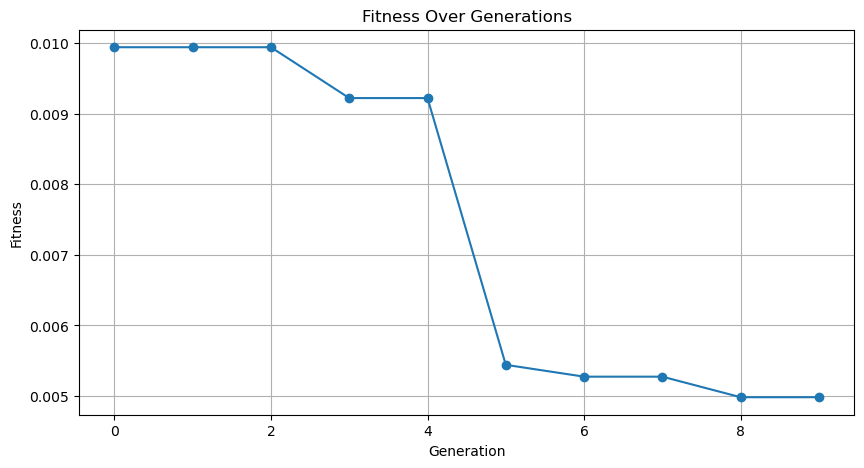

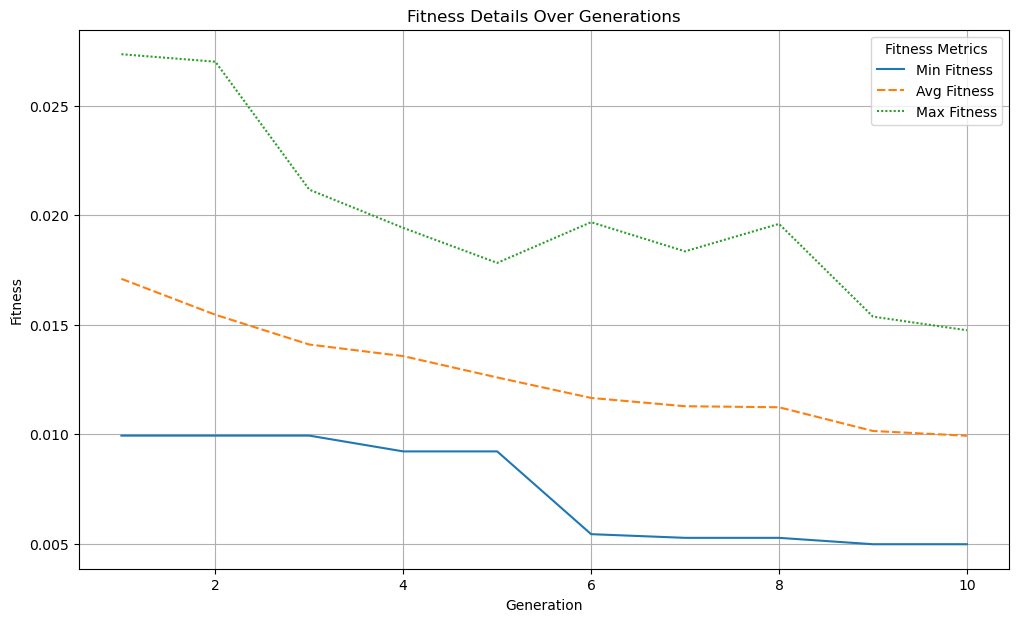

In [26]:
train_C_GA4 = Set_N_GA.main(df_train, columns, config_GA, population, 4)

## GA5

2024-05-27 15:32:05,199 - INFO - Initializing GA with population size: 100
2024-05-27 15:33:24,832 - INFO - New best fitness found: 0.010391
2024-05-27 15:33:24,833 - INFO - Generation 0 complete. Best fitness: 0.010391


time taken in generation 0 : 79.6334 seconds


2024-05-27 15:34:42,296 - INFO - New best fitness found: 0.010064
2024-05-27 15:34:42,297 - INFO - Generation 1 complete. Best fitness: 0.010064


time taken in generation 1 : 77.4636 seconds


2024-05-27 15:35:59,580 - INFO - New best fitness found: 0.009313
2024-05-27 15:35:59,581 - INFO - Generation 2 complete. Best fitness: 0.009313


time taken in generation 2 : 77.2837 seconds


2024-05-27 15:37:16,586 - INFO - Generation 3 complete. Best fitness: 0.009313


time taken in generation 3 : 77.0050 seconds


2024-05-27 15:38:38,349 - INFO - New best fitness found: 0.008998
2024-05-27 15:38:38,350 - INFO - Generation 4 complete. Best fitness: 0.008998


time taken in generation 4 : 81.7627 seconds


2024-05-27 15:40:04,947 - INFO - New best fitness found: 0.008318
2024-05-27 15:40:04,948 - INFO - Generation 5 complete. Best fitness: 0.008318


time taken in generation 5 : 86.5983 seconds


2024-05-27 15:41:28,647 - INFO - Generation 6 complete. Best fitness: 0.008318


time taken in generation 6 : 83.6984 seconds


2024-05-27 15:42:51,735 - INFO - New best fitness found: 0.008121
2024-05-27 15:42:51,736 - INFO - Generation 7 complete. Best fitness: 0.008121


time taken in generation 7 : 83.0877 seconds


2024-05-27 15:44:16,149 - INFO - Generation 8 complete. Best fitness: 0.008121


time taken in generation 8 : 84.4133 seconds


2024-05-27 15:45:39,572 - INFO - Generation 9 complete. Best fitness: 0.008121


time taken in generation 9 : 83.4221 seconds
best_individual, [116, 67, 99, 63, 35, 9, 57, 151, 211, 226, 202, 91, 167, 154, 50, 14, 231]
Set_N       purpose  int.rate  installment  log.annual.inc       dti      fico  \
116  0.166667  0.120205     0.226670        0.511740  0.649866  0.534884   
67   0.333333  0.417519     0.120620        0.425602  0.412550  0.558140   
99   0.166667  0.308824     0.248002        0.552950  0.697931  0.627907   
63   0.333333  0.376598     0.700520        0.520985  0.471295  0.534884   
35   0.333333  0.417519     0.417461        0.477097  0.672563  0.581395   
9    0.166667  0.148338     0.085227        0.539615  0.278371  0.581395   
57   0.000000  0.127877     0.172877        0.526833  0.444259  0.790698   
151  0.333333  0.111253     0.137549        0.532451  0.598798  0.697674   
211  0.333333  0.328645     0.482482        0.363610  0.438919  0.651163   
226  0.166667  0.240409     0.198698        0.421692  0.560748  0.558140   
202  0.333333  0.361

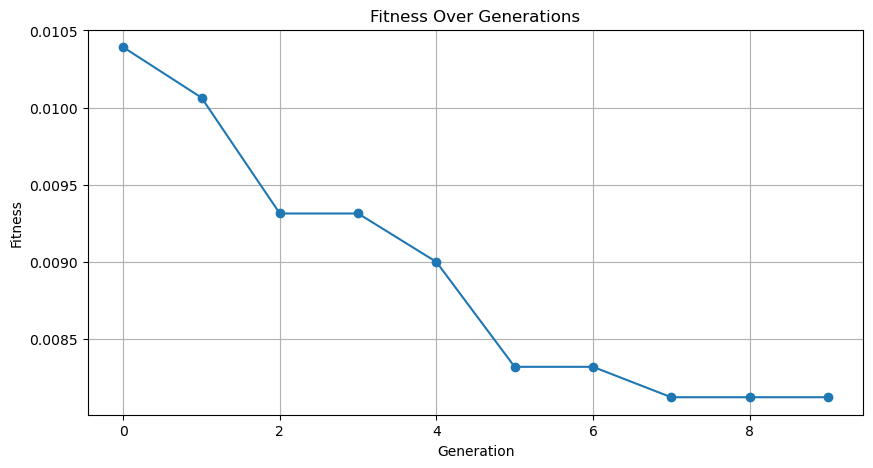

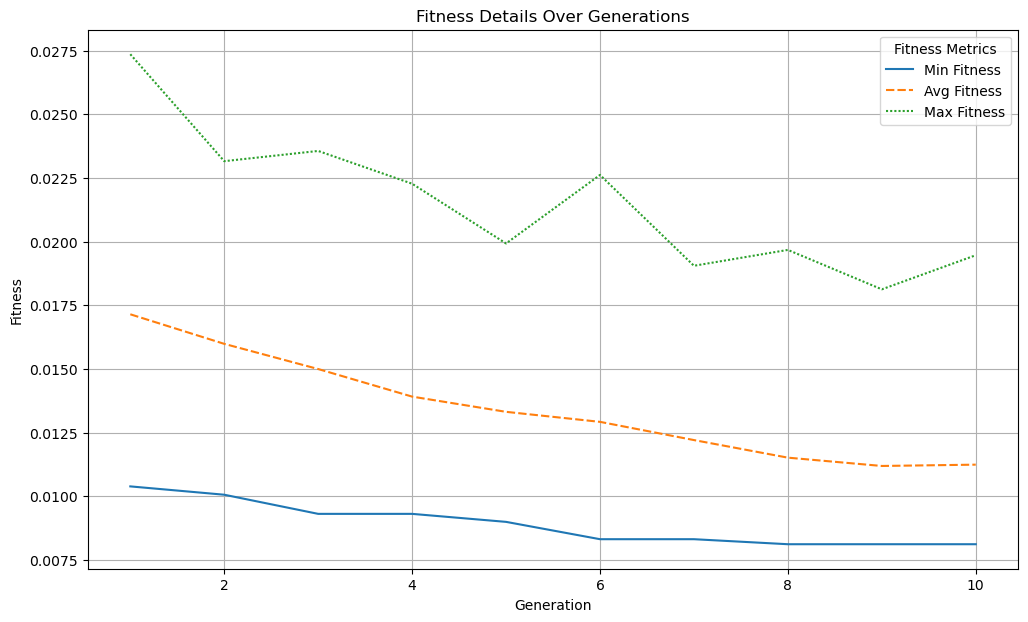

In [27]:
train_C_GA5 = Set_N_GA.main(df_train, columns, config_GA, population, 5)

## GA6

2024-05-27 15:45:39,937 - INFO - Initializing GA with population size: 100
2024-05-27 15:47:01,762 - INFO - New best fitness found: 0.010761
2024-05-27 15:47:01,763 - INFO - Generation 0 complete. Best fitness: 0.010761


time taken in generation 0 : 81.8251 seconds


2024-05-27 15:48:23,283 - INFO - Generation 1 complete. Best fitness: 0.010761


time taken in generation 1 : 81.5197 seconds


2024-05-27 15:49:46,387 - INFO - New best fitness found: 0.010282
2024-05-27 15:49:46,388 - INFO - Generation 2 complete. Best fitness: 0.010282


time taken in generation 2 : 83.1040 seconds


2024-05-27 15:51:08,837 - INFO - Generation 3 complete. Best fitness: 0.010282


time taken in generation 3 : 82.4487 seconds


2024-05-27 15:52:33,556 - INFO - New best fitness found: 0.009140
2024-05-27 15:52:33,557 - INFO - Generation 4 complete. Best fitness: 0.009140


time taken in generation 4 : 84.7191 seconds


2024-05-27 15:53:54,590 - INFO - Generation 5 complete. Best fitness: 0.009140


time taken in generation 5 : 81.0327 seconds


2024-05-27 15:55:16,201 - INFO - Generation 6 complete. Best fitness: 0.009140


time taken in generation 6 : 81.6107 seconds


2024-05-27 15:56:38,181 - INFO - New best fitness found: 0.007955
2024-05-27 15:56:38,182 - INFO - Generation 7 complete. Best fitness: 0.007955


time taken in generation 7 : 81.9794 seconds


2024-05-27 15:58:00,103 - INFO - Generation 8 complete. Best fitness: 0.007955


time taken in generation 8 : 81.9207 seconds


2024-05-27 15:59:21,831 - INFO - Generation 9 complete. Best fitness: 0.007955


time taken in generation 9 : 81.7273 seconds
best_individual, [156, 33, 168, 14, 13, 183, 211, 187, 131, 137, 141, 180, 181, 9, 193, 186, 185]
Set_N       purpose  int.rate  installment  log.annual.inc       dti      fico  \
156  0.333333  0.271739     0.263297        0.436785  0.668892  0.488372   
33   0.333333  0.397059     0.523608        0.537148  0.116155  0.604651   
168  0.333333  0.216113     0.204431        0.421692  0.635180  0.558140   
14   0.333333  0.187980     0.364533        0.540486  0.718625  0.581395   
13   0.333333  0.750639     0.840265        0.505892  0.761348  0.232558   
183  0.000000  0.271739     0.193235        0.421692  0.497330  0.697674   
211  0.333333  0.328645     0.482482        0.363610  0.438919  0.651163   
187  0.333333  0.439258     0.865296        0.611033  0.269693  0.488372   
131  0.000000  0.072890     0.183857        0.496045  0.448264  0.697674   
137  0.333333  0.316496     0.443075        0.471789  0.189920  0.674419   
141  0.833333  

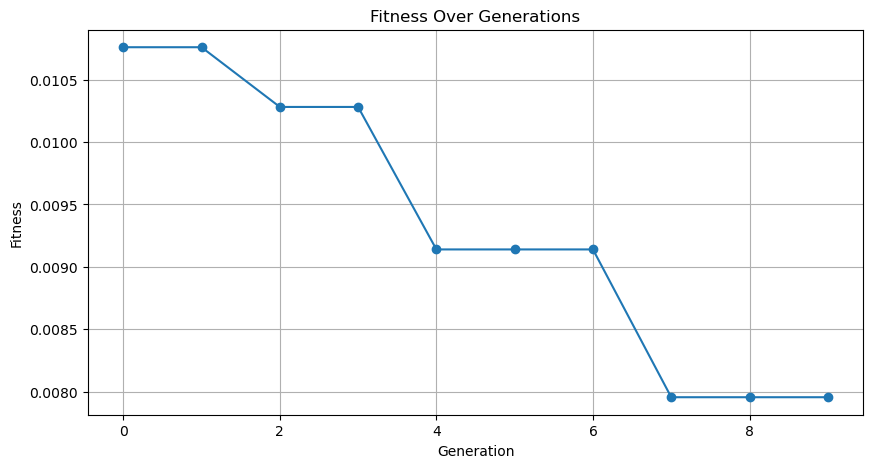

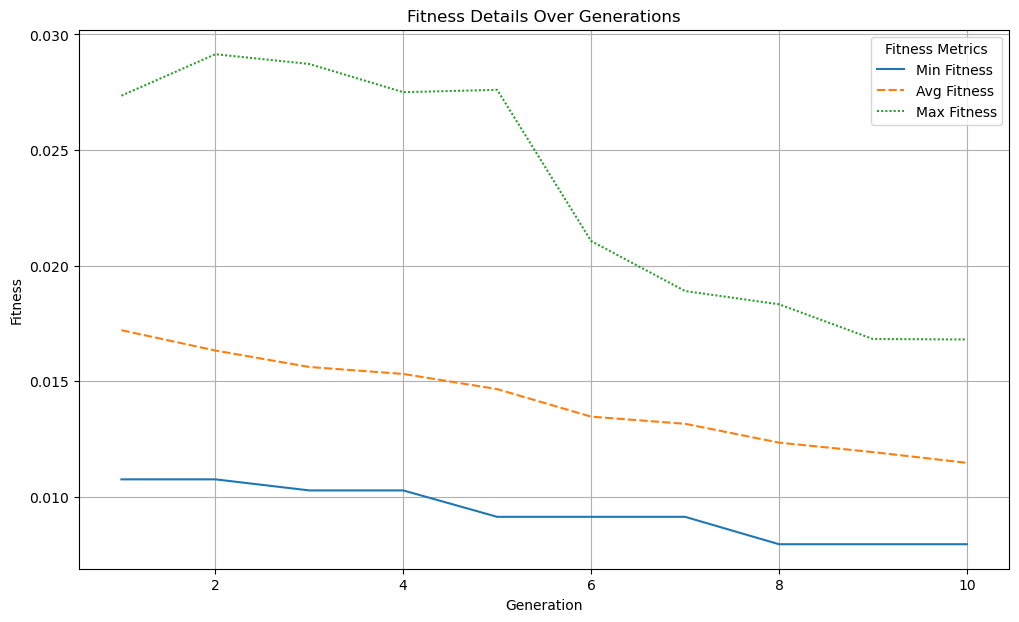

In [28]:
train_C_GA6 = Set_N_GA.main(df_train, columns, config_GA, population, 6)

## GA7

In [ ]:
#train_C_GA7 = Set_N_GA.main(df_train, columns, config_GA, 7)

## GA8

In [ ]:
#train_C_GA8 = Set_N_GA.main(df_train, columns, config_GA, 8)

## GA9

In [ ]:
#train_C_GA9 = Set_N_GA.main(df_train, columns, config_GA, 9)

## GA10

In [ ]:
#train_C_GA10 = Set_N_GA.main(df_train, columns, config_GA, 10)

# Complexity Measures

In [36]:
import Complexity

In [32]:


X1 = df_train.drop(columns=['class_label']).values.tolist()
y1 = df_train['class_label'].values.tolist()

X2 = train_C_random.drop(columns=['class_label']).values.tolist()
y2 = train_C_random['class_label'].values.tolist()

X3 = train_C_weighted.drop(columns=['class_label']).values.tolist()
y3 = train_C_weighted['class_label'].values.tolist()

X4 = train_C_GA1.drop(columns=['class_label']).values.tolist()
y4 = train_C_GA1['class_label'].values.tolist()

X5 = train_C_GA2.drop(columns=['class_label']).values.tolist()
y5 = train_C_GA2['class_label'].values.tolist()

X6 = train_C_GA3.drop(columns=['class_label']).values.tolist()
y6 = train_C_GA3['class_label'].values.tolist()

X7 = train_C_GA4.drop(columns=['class_label']).values.tolist()
y7 = train_C_GA4['class_label'].values.tolist()

X8 = train_C_GA5.drop(columns=['class_label']).values.tolist()
y8 = train_C_GA5['class_label'].values.tolist()

X9 = train_C_GA6.drop(columns=['class_label']).values.tolist()
y9 = train_C_GA6['class_label'].values.tolist()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Example usage:
datasets = [
    {"X": X1, "y": y1, "name": "Original Dataset"},
    {"X": X2, "y": y2, "name": "Random Concatenation"},
    {"X": X3, "y": y3, "name": "Weighted Concatenation"},
    {"X": X4, "y": y4, "name": "GA1"},
    {"X": X5, "y": y5, "name": "GA2"},
    {"X": X6, "y": y6, "name": "GA3"},
    {"X": X7, "y": y7, "name": "GA4"},
    {"X": X8, "y": y8, "name": "GA5"},
    {"X": X9, "y": y9, "name": "GA6"},
]

measures = ["Adapted_N1", "Adapted_N2", "Adapted_N3", "Adapted_CM"]

minority_measures = {measure: [] for measure in measures}
majority_measures = {measure: [] for measure in measures}



In [37]:
for dataset in datasets:
    complexity = Complexity.Complexity(dataset["X"], dataset["y"],distance_func="euclidean")

    n1_adapted = complexity.N1_adapted()
    minority_measures["Adapted_N1"].append(n1_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N1"].append(n1_adapted[np.argmax(complexity.class_count)])

    n2_adapted = complexity.N2_adapted()
    minority_measures["Adapted_N2"].append(n2_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N2"].append(n2_adapted[np.argmax(complexity.class_count)])
    
    n3_adapted = complexity.N3_adapted()
    minority_measures["Adapted_N3"].append(n3_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_N3"].append(n3_adapted[np.argmax(complexity.class_count)])
    
    cm_adapted = complexity.CM_adapted()
    minority_measures["Adapted_CM"].append(cm_adapted[np.argmin(complexity.class_count)])
    majority_measures["Adapted_CM"].append(cm_adapted[np.argmax(complexity.class_count)])
    print('dataset["X"]')

dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]
dataset["X"]


In [42]:
epsilon = 0.01
for c in minority_measures :
    for i in range(len(minority_measures[c])):
        if minority_measures[c][i] == 0 :
            minority_measures[c][i] = epsilon

In [53]:
ep = 0.00025
for c in majority_measures :
    for i in range(len(majority_measures[c])):
        if majority_measures[c][i] == 0 :
            majority_measures[c][i] = ep

                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N1    0.785714  Minority
1         Original Dataset  Adapted_N1    0.129310  Majority
2     Random Concatenation  Adapted_N1    0.010000  Minority
3     Random Concatenation  Adapted_N1    0.067191  Majority
4   Weighted Concatenation  Adapted_N1    0.010000  Minority
5   Weighted Concatenation  Adapted_N1    0.036765  Majority
6                      GA1  Adapted_N1    0.010000  Minority
7                      GA1  Adapted_N1    0.012424  Majority
8                      GA2  Adapted_N1    0.010000  Minority
9                      GA2  Adapted_N1    0.009381  Majority
10                     GA3  Adapted_N1    0.010000  Minority
11                     GA3  Adapted_N1    0.014706  Majority
12                     GA4  Adapted_N1    0.010000  Minority
13                     GA4  Adapted_N1    0.015467  Majority
14                     GA5  Adapted_N1    0.010000  Minority
15                     G

/tmp/ipykernel_11161/3389095242.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


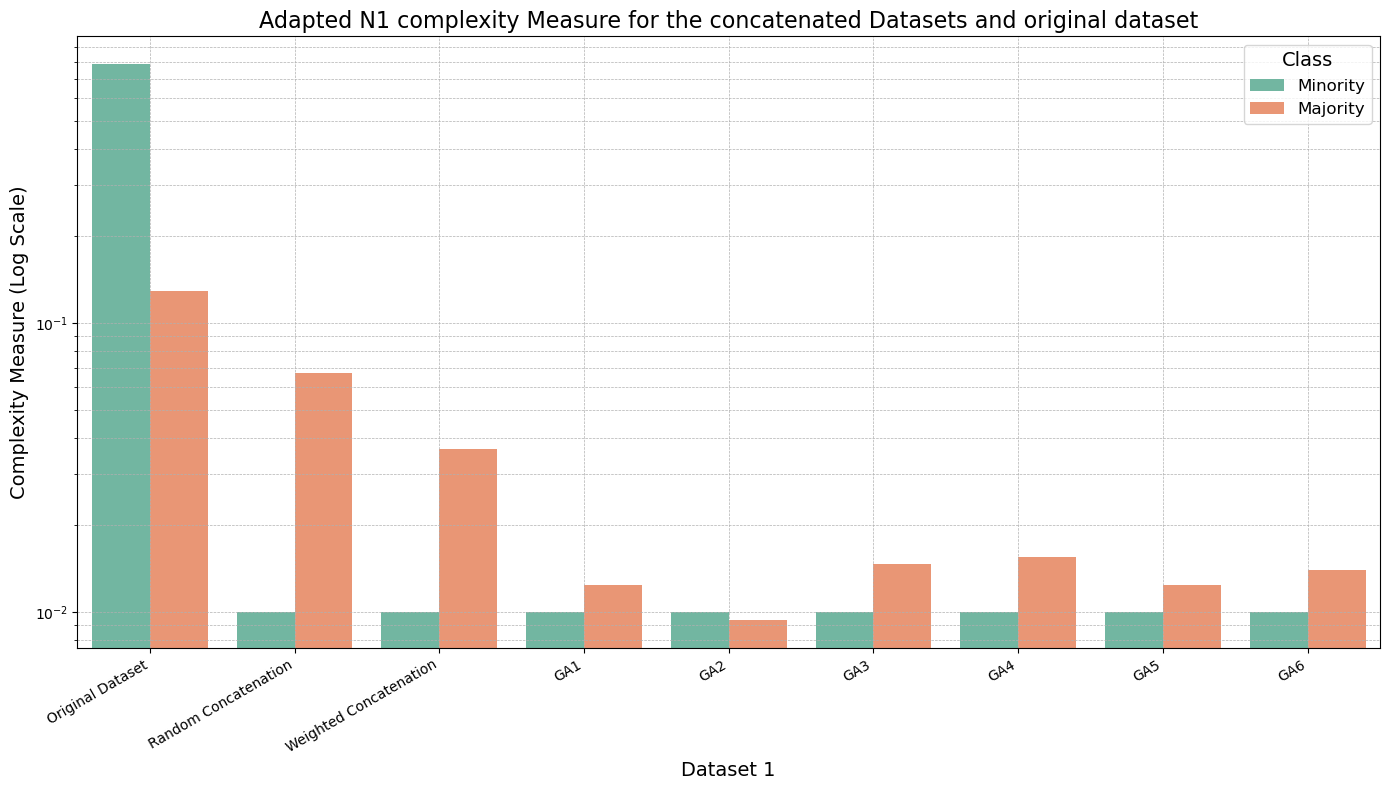

In [49]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[0], 'Complexity': minority_measures[measures[0]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[0], 'Complexity': majority_measures[measures[0]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N1 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 1', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N2    1.204352  Minority
1         Original Dataset  Adapted_N2    0.700383  Majority
2     Random Concatenation  Adapted_N2    0.476790  Minority
3     Random Concatenation  Adapted_N2    0.484345  Majority
4   Weighted Concatenation  Adapted_N2    0.384573  Minority
5   Weighted Concatenation  Adapted_N2    0.431603  Majority
6                      GA1  Adapted_N2    0.369210  Minority
7                      GA1  Adapted_N2    0.330414  Majority
8                      GA2  Adapted_N2    0.365006  Minority
9                      GA2  Adapted_N2    0.336903  Majority
10                     GA3  Adapted_N2    0.404187  Minority
11                     GA3  Adapted_N2    0.349434  Majority
12                     GA4  Adapted_N2    0.391335  Minority
13                     GA4  Adapted_N2    0.367765  Majority
14                     GA5  Adapted_N2    0.373956  Minority
15                     G

/tmp/ipykernel_11161/2009711436.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


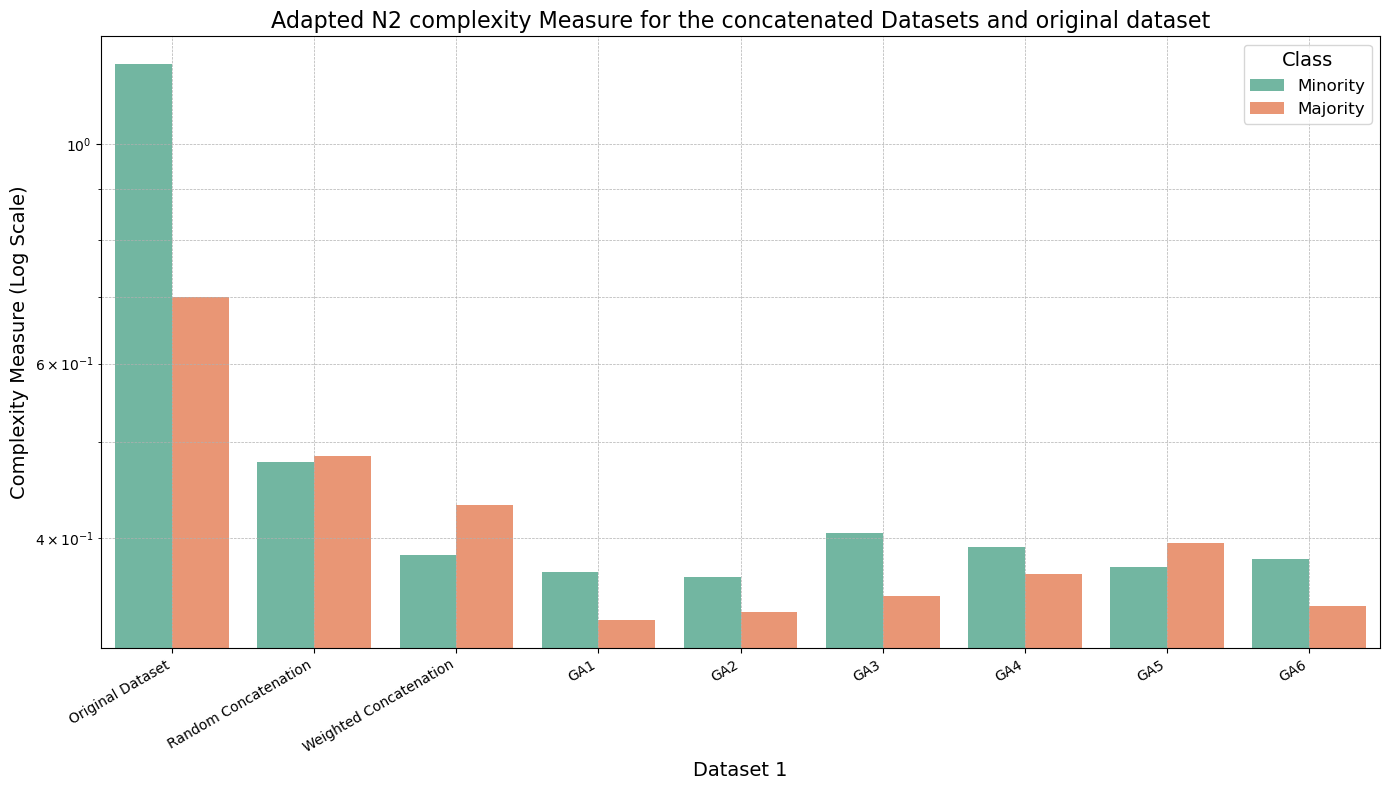

In [51]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[1], 'Complexity': minority_measures[measures[1]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[1], 'Complexity': majority_measures[measures[1]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N2 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 1', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_N3    0.785714  Minority
1         Original Dataset  Adapted_N3    0.150862  Majority
2     Random Concatenation  Adapted_N3    0.026786  Minority
3     Random Concatenation  Adapted_N3    0.011156  Majority
4   Weighted Concatenation  Adapted_N3    0.018814  Minority
5   Weighted Concatenation  Adapted_N3    0.002282  Majority
6                      GA1  Adapted_N3    0.001276  Minority
7                      GA1  Adapted_N3    0.000250  Majority
8                      GA2  Adapted_N3    0.010000  Minority
9                      GA2  Adapted_N3    0.000250  Majority
10                     GA3  Adapted_N3    0.000638  Minority
11                     GA3  Adapted_N3    0.000507  Majority
12                     GA4  Adapted_N3    0.001276  Minority
13                     GA4  Adapted_N3    0.000250  Majority
14                     GA5  Adapted_N3    0.000638  Minority
15                     G

/tmp/ipykernel_11161/1740070680.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


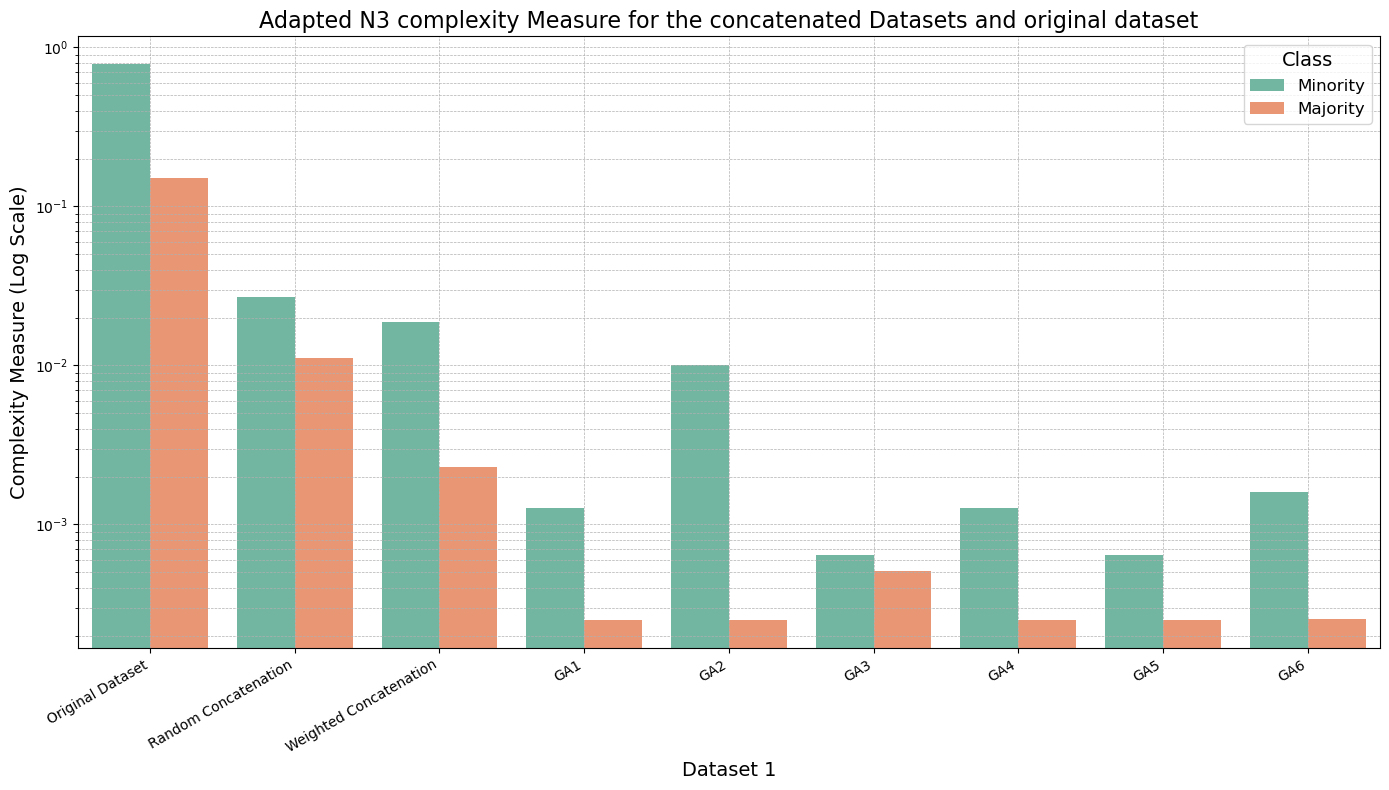

In [54]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[2], 'Complexity': minority_measures[measures[2]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[2], 'Complexity': majority_measures[measures[2]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted N3 complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 1', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


                   Dataset     Measure  Complexity     Class
0         Original Dataset  Adapted_CM    0.982143  Minority
1         Original Dataset  Adapted_CM    0.439655  Majority
2     Random Concatenation  Adapted_CM    0.152742  Minority
3     Random Concatenation  Adapted_CM    0.068205  Majority
4   Weighted Concatenation  Adapted_CM    0.082270  Minority
5   Weighted Concatenation  Adapted_CM    0.028651  Majority
6                      GA1  Adapted_CM    0.013393  Minority
7                      GA1  Adapted_CM    0.002789  Majority
8                      GA2  Adapted_CM    0.014668  Minority
9                      GA2  Adapted_CM    0.004057  Majority
10                     GA3  Adapted_CM    0.017538  Minority
11                     GA3  Adapted_CM    0.005325  Majority
12                     GA4  Adapted_CM    0.024872  Minority
13                     GA4  Adapted_CM    0.004564  Majority
14                     GA5  Adapted_CM    0.023916  Minority
15                     G

/tmp/ipykernel_11161/472024332.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)


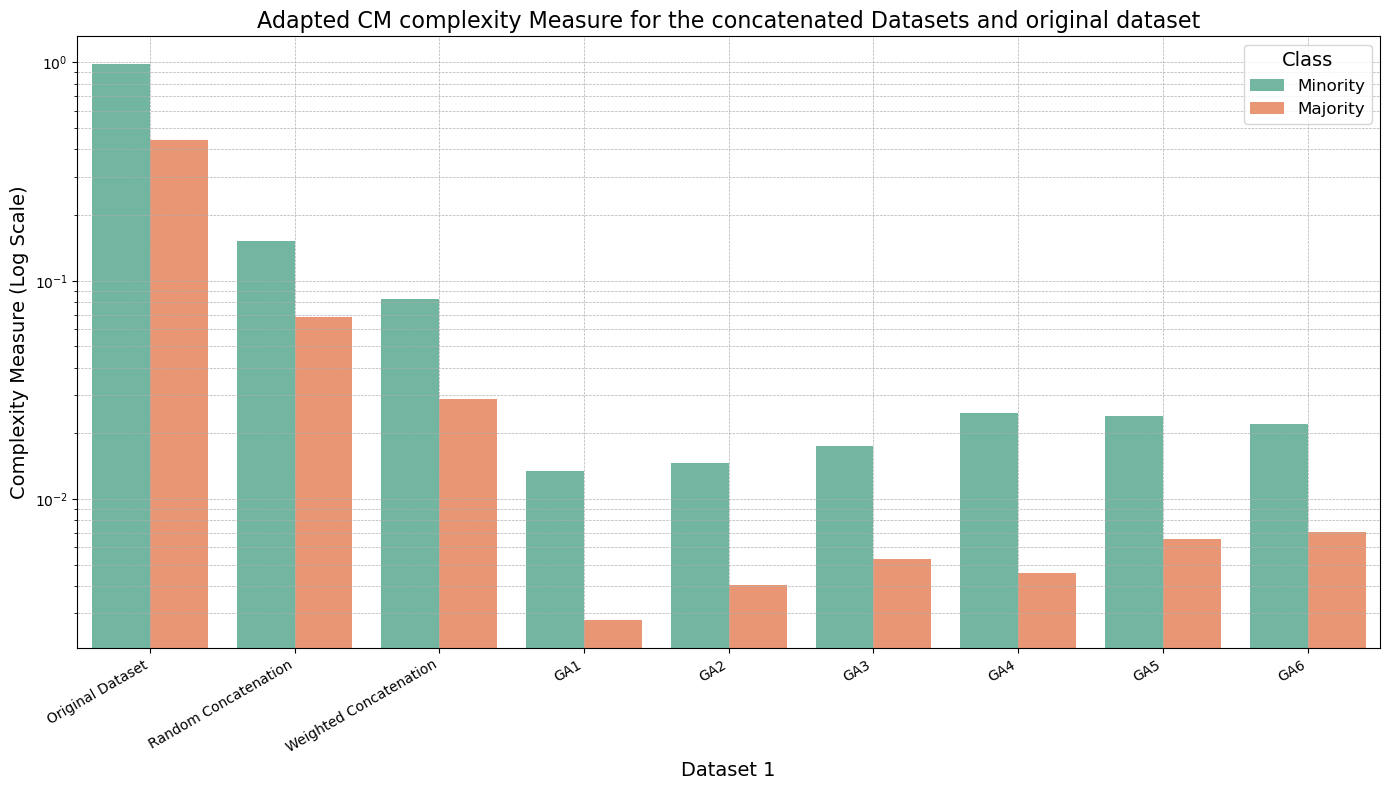

In [55]:
def plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35):
    # Prepare the data for plotting
    data = []
    for i, dataset in enumerate(datasets):
        
        #for measure in measures:
        data.append({'Dataset': dataset["name"], 'Measure': measures[3], 'Complexity': minority_measures[measures[3]][i], 'Class': 'Minority'})
        data.append({'Dataset': dataset["name"], 'Measure': measures[3], 'Complexity': majority_measures[measures[3]][i], 'Class': 'Majority'})

    # Combine data into a single DataFrame
    df = pd.DataFrame(data)
    print(df)

    # Plot settings
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a barplot
    sns.barplot(x='Dataset', y='Complexity', hue='Class', data=df, ax=ax, palette='Set2', ci=None)

    # Customize the plot
    ax.set_title('Adapted CM complexity Measure for the concatenated Datasets and original dataset', fontsize=16)
    ax.set_ylabel('Complexity Measure (Log Scale)', fontsize=14)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_xlabel('Dataset 1', fontsize=14)
    ax.legend(title='Class', fontsize=12, title_fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Rotate x-axis labels
    plt.xticks(rotation=30, ha='right')
    # Adjust layout for better fit
    plt.tight_layout()
    plt.show()

plot_complexity_measures_single(measures, minority_measures, majority_measures, datasets, bar_width=0.35)


# MLP Evaluation

In [29]:
config = {
    'k_folds': 10,
    'random_seed': 42,
    'batch_size': 32,
    'learning_rate': 0.001,
    'num_epochs': 50,
    'early_stopping_patience': 5
}

In [30]:
#import MLP_6
import MLP_13
#import MLP_model

In [31]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
device

device(type='cuda')

In [33]:
MLP_13.main(df_train, config)

2024-05-27 15:59:22,802 - INFO - Starting repeat 1 of 10
2024-05-27 15:59:24,421 - INFO - Early stopping at epoch 38
2024-05-27 15:59:25,093 - INFO - Early stopping at epoch 38
2024-05-27 15:59:30,567 - INFO - Experiment Average Metrics: {'accuracy': 0.7951600985221676, 'f1': 0.8789505958194995, 'recall': 0.9805217391304349, 'roc_auc': 0.621791876430206, 'g_mean': 0.0187387926592614}
2024-05-27 15:59:30,568 - INFO - Experiment Train Losses: 0.541273244806524
2024-05-27 15:59:30,568 - INFO - Experiment Validation Losses: 0.5260716798290548
2024-05-27 15:59:30,568 - INFO - Starting repeat 2 of 10
2024-05-27 15:59:31,056 - INFO - Early stopping at epoch 32
2024-05-27 15:59:31,667 - INFO - Early stopping at epoch 47
2024-05-27 15:59:36,931 - INFO - Experiment Average Metrics: {'accuracy': 0.7843940886699509, 'f1': 0.8636103882482693, 'recall': 0.965304347826087, 'roc_auc': 0.5883544461147086, 'g_mean': 0.008987649730736689}
2024-05-27 15:59:36,931 - INFO - Experiment Train Losses: 0.546844

{'accuracy': 0.7904138839214156,
 'f1': 0.8728669836954954,
 'recall': 0.9742212055930751,
 'roc_auc': 0.5867176795133587,
 'g_mean': 0.014226669077549079}

In [34]:
MLP_13.main(train_C_random, config)

2024-05-27 16:00:29,620 - INFO - Starting repeat 1 of 10
2024-05-27 16:02:11,583 - INFO - Experiment Average Metrics: {'accuracy': 0.9519350282485876, 'f1': 0.9582756903421956, 'recall': 0.9725140654115532, 'roc_auc': 0.9885823578608216, 'g_mean': 0.9482685383026415}
2024-05-27 16:02:11,583 - INFO - Experiment Train Losses: 0.1594349459311722
2024-05-27 16:02:11,584 - INFO - Experiment Validation Losses: 0.1272930842522306
2024-05-27 16:02:11,584 - INFO - Starting repeat 2 of 10
2024-05-27 16:03:49,692 - INFO - Experiment Average Metrics: {'accuracy': 0.9519406779661018, 'f1': 0.9582752053587569, 'recall': 0.972209959519373, 'roc_auc': 0.9890198356260198, 'g_mean': 0.9482672893396231}
2024-05-27 16:03:49,693 - INFO - Experiment Train Losses: 0.15995205333409537
2024-05-27 16:03:49,693 - INFO - Experiment Validation Losses: 0.12702538861445048
2024-05-27 16:03:49,693 - INFO - Starting repeat 3 of 10
2024-05-27 16:05:30,265 - INFO - Experiment Average Metrics: {'accuracy': 0.952454802259

{'accuracy': 0.9521269456935317,
 'f1': 0.9583714090350923,
 'recall': 0.9720519854128119,
 'roc_auc': 0.9887421311752889,
 'g_mean': 0.948639812463239}

In [35]:
MLP_13.main(train_C_weighted, config)

2024-05-27 16:20:12,897 - INFO - Starting repeat 1 of 10
2024-05-27 16:23:10,656 - INFO - Experiment Average Metrics: {'accuracy': 0.9511129943502825, 'f1': 0.9576980811358726, 'recall': 0.9728273597635418, 'roc_auc': 0.984433446099328, 'g_mean': 0.9470782183690378}
2024-05-27 16:23:10,658 - INFO - Experiment Train Losses: 0.17920257560935487
2024-05-27 16:23:10,658 - INFO - Experiment Validation Losses: 0.1405658150178211
2024-05-27 16:23:10,659 - INFO - Starting repeat 2 of 10
2024-05-27 16:26:14,047 - INFO - Experiment Average Metrics: {'accuracy': 0.9499180790960453, 'f1': 0.9567209788344773, 'recall': 0.9723362590760137, 'roc_auc': 0.9845182926023188, 'g_mean': 0.9457574146619988}
2024-05-27 16:26:14,048 - INFO - Experiment Train Losses: 0.1826892956030465
2024-05-27 16:26:14,048 - INFO - Experiment Validation Losses: 0.14268884761212985
2024-05-27 16:26:14,049 - INFO - Starting repeat 3 of 10
2024-05-27 16:29:14,580 - INFO - Experiment Average Metrics: {'accuracy': 0.950045197740

{'accuracy': 0.9494985875706213,
 'f1': 0.9563624406887951,
 'recall': 0.972299534794063,
 'roc_auc': 0.9842634859435182,
 'g_mean': 0.9452726627572379}

In [36]:
MLP_13.main(train_C_GA1, config)

2024-05-27 16:51:04,278 - INFO - Starting repeat 1 of 10
2024-05-27 16:53:58,527 - INFO - Experiment Average Metrics: {'accuracy': 0.9783728813559321, 'f1': 0.981198054852063, 'recall': 0.9919055452033667, 'roc_auc': 0.9960501182992971, 'g_mean': 0.9761471918758329}
2024-05-27 16:53:58,528 - INFO - Experiment Train Losses: 0.10240083776061928
2024-05-27 16:53:58,528 - INFO - Experiment Validation Losses: 0.07435911266695885
2024-05-27 16:53:58,528 - INFO - Starting repeat 2 of 10
2024-05-27 16:56:41,081 - INFO - Experiment Average Metrics: {'accuracy': 0.9776977401129943, 'f1': 0.9806781793551999, 'recall': 0.9922498747028208, 'roc_auc': 0.9961179048122828, 'g_mean': 0.9752223070413037}
2024-05-27 16:56:41,082 - INFO - Experiment Train Losses: 0.10149828160286155
2024-05-27 16:56:41,083 - INFO - Experiment Validation Losses: 0.0740830892418368
2024-05-27 16:56:41,084 - INFO - Starting repeat 3 of 10
2024-05-27 16:59:39,331 - INFO - Experiment Average Metrics: {'accuracy': 0.97778813559

{'accuracy': 0.977818571803968,
 'f1': 0.9807578769580152,
 'recall': 0.9921285056536897,
 'roc_auc': 0.9960641843882702,
 'g_mean': 0.9754212603381877}

In [37]:
MLP_13.main(train_C_GA2, config)

2024-05-27 17:20:47,744 - INFO - Starting repeat 1 of 10
2024-05-27 17:23:55,744 - INFO - Experiment Average Metrics: {'accuracy': 0.9837090395480226, 'f1': 0.9859337241846132, 'recall': 0.9956641907087322, 'roc_auc': 0.9968634526008723, 'g_mean': 0.9817160436586011}
2024-05-27 17:23:55,745 - INFO - Experiment Train Losses: 0.08538024064714851
2024-05-27 17:23:55,745 - INFO - Experiment Validation Losses: 0.05961862424610298
2024-05-27 17:23:55,746 - INFO - Starting repeat 2 of 10
2024-05-27 17:27:07,063 - INFO - Experiment Average Metrics: {'accuracy': 0.9839406779661017, 'f1': 0.9861920992587256, 'recall': 0.995948416115145, 'roc_auc': 0.9969222630088526, 'g_mean': 0.9818906505415042}
2024-05-27 17:27:07,065 - INFO - Experiment Train Losses: 0.08271927621348205
2024-05-27 17:27:07,066 - INFO - Experiment Validation Losses: 0.05813054496931748
2024-05-27 17:27:07,066 - INFO - Starting repeat 3 of 10
2024-05-27 17:30:19,763 - INFO - Experiment Average Metrics: {'accuracy': 0.9831836158

{'accuracy': 0.9834926553672318,
 'f1': 0.985839080150178,
 'recall': 0.995957231896164,
 'roc_auc': 0.9968427363851636,
 'g_mean': 0.9813097776088731}

In [38]:
MLP_13.main(train_C_GA3, config)

2024-05-27 17:52:01,743 - INFO - Starting repeat 1 of 10
2024-05-27 17:54:30,922 - INFO - Experiment Average Metrics: {'accuracy': 0.9810254237288134, 'f1': 0.9835125069582759, 'recall': 0.9934437447792842, 'roc_auc': 0.9965055566730501, 'g_mean': 0.9790053075532752}
2024-05-27 17:54:30,922 - INFO - Experiment Train Losses: 0.09296453741180964
2024-05-27 17:54:30,923 - INFO - Experiment Validation Losses: 0.06540129431573476
2024-05-27 17:54:30,923 - INFO - Starting repeat 2 of 10
2024-05-27 17:56:18,291 - INFO - Experiment Average Metrics: {'accuracy': 0.9813107344632768, 'f1': 0.9838380768665053, 'recall': 0.994203495470025, 'roc_auc': 0.9966835684299078, 'g_mean': 0.9791338590985784}
2024-05-27 17:56:18,292 - INFO - Experiment Train Losses: 0.09373022079926895
2024-05-27 17:56:18,293 - INFO - Experiment Validation Losses: 0.06529389531632591
2024-05-27 17:56:18,294 - INFO - Starting repeat 3 of 10
2024-05-27 17:58:01,541 - INFO - Experiment Average Metrics: {'accuracy': 0.9801807909

{'accuracy': 0.9804838983050846,
 'f1': 0.9831125453243809,
 'recall': 0.9937000539741695,
 'roc_auc': 0.9965240992189465,
 'g_mean': 0.9782513786283857}

In [39]:
MLP_13.main(train_C_GA4, config)

2024-05-27 18:10:58,920 - INFO - Starting repeat 1 of 10
2024-05-27 18:13:18,355 - INFO - Experiment Average Metrics: {'accuracy': 0.981409604519774, 'f1': 0.9838930857171226, 'recall': 0.9924896613763412, 'roc_auc': 0.9963536897496628, 'g_mean': 0.9795572688068823}
2024-05-27 18:13:18,356 - INFO - Experiment Train Losses: 0.09193238569018763
2024-05-27 18:13:18,357 - INFO - Experiment Validation Losses: 0.06336128013846809
2024-05-27 18:13:18,358 - INFO - Starting repeat 2 of 10
2024-05-27 18:16:13,495 - INFO - Experiment Average Metrics: {'accuracy': 0.98145197740113, 'f1': 0.9839042124833615, 'recall': 0.9922923215318384, 'roc_auc': 0.9962366346171896, 'g_mean': 0.979657473067341}
2024-05-27 18:16:13,496 - INFO - Experiment Train Losses: 0.09273625811172939
2024-05-27 18:16:13,496 - INFO - Experiment Validation Losses: 0.06352292420566083
2024-05-27 18:16:13,497 - INFO - Starting repeat 3 of 10
2024-05-27 18:19:14,451 - INFO - Experiment Average Metrics: {'accuracy': 0.9811694915254

{'accuracy': 0.9809686440677965,
 'f1': 0.9835338342441848,
 'recall': 0.9924460875152605,
 'roc_auc': 0.9962307142734147,
 'g_mean': 0.9790283715654003}

In [40]:
MLP_13.main(train_C_GA5, config)

2024-05-27 18:36:02,767 - INFO - Starting repeat 1 of 10
2024-05-27 18:38:44,947 - INFO - Experiment Average Metrics: {'accuracy': 0.957827683615819, 'f1': 0.9629129474715867, 'recall': 0.9713146565572188, 'roc_auc': 0.9923807653552673, 'g_mean': 0.9555619148343848}
2024-05-27 18:38:44,947 - INFO - Experiment Train Losses: 0.14207135958611064
2024-05-27 18:38:44,948 - INFO - Experiment Validation Losses: 0.11103455552283834
2024-05-27 18:38:44,948 - INFO - Starting repeat 2 of 10
2024-05-27 18:40:59,886 - INFO - Experiment Average Metrics: {'accuracy': 0.9585564971751411, 'f1': 0.9635333010914213, 'recall': 0.9715114566600269, 'roc_auc': 0.9925485791523251, 'g_mean': 0.9564073311436587}
2024-05-27 18:40:59,887 - INFO - Experiment Train Losses: 0.14232737341798837
2024-05-27 18:40:59,887 - INFO - Experiment Validation Losses: 0.10973267995488958
2024-05-27 18:40:59,888 - INFO - Starting repeat 3 of 10
2024-05-27 18:43:20,395 - INFO - Experiment Average Metrics: {'accuracy': 0.9591186440

{'accuracy': 0.9583813559322033,
 'f1': 0.9633328707508797,
 'recall': 0.9711682387714453,
 'roc_auc': 0.9925099622672235,
 'g_mean': 0.9562924032095317}

In [41]:
MLP_13.main(train_C_GA6, config)

2024-05-27 18:59:16,498 - INFO - Starting repeat 1 of 10
2024-05-27 19:01:29,363 - INFO - Experiment Average Metrics: {'accuracy': 0.9819322033898304, 'f1': 0.9843868457236568, 'recall': 0.9911645955150036, 'roc_auc': 0.996291602728253, 'g_mean': 0.9802456913597632}
2024-05-27 19:01:29,364 - INFO - Experiment Train Losses: 0.08926749518110365
2024-05-27 19:01:29,365 - INFO - Experiment Validation Losses: 0.06263773874934692
2024-05-27 19:01:29,365 - INFO - Starting repeat 2 of 10
2024-05-27 19:04:02,560 - INFO - Experiment Average Metrics: {'accuracy': 0.9818305084745763, 'f1': 0.9843693318464333, 'recall': 0.9917940628413545, 'roc_auc': 0.9963289765151094, 'g_mean': 0.9799719318254345}
2024-05-27 19:04:02,561 - INFO - Experiment Train Losses: 0.09076010370949064
2024-05-27 19:04:02,561 - INFO - Experiment Validation Losses: 0.0632983075260236
2024-05-27 19:04:02,562 - INFO - Starting repeat 3 of 10
2024-05-27 19:06:23,988 - INFO - Experiment Average Metrics: {'accuracy': 0.98119209039

{'accuracy': 0.9817039548022598,
 'f1': 0.9842365587107296,
 'recall': 0.9915200681102615,
 'roc_auc': 0.9963192690567169,
 'g_mean': 0.9798967571739985}